In [1]:
#import potrzebnych bibliotek
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

#Wstępna analiza danych

  Sex  Bwt  Hwt
0   F  2.0  7.0
1   F  2.0  7.4
2   F  2.0  9.5
3   F  2.1  7.2
4   F  2.1  7.3
              Bwt         Hwt
count  144.000000  144.000000
mean     2.723611   10.630556
std      0.485307    2.434636
min      2.000000    6.300000
25%      2.300000    8.950000
50%      2.700000   10.100000
75%      3.025000   12.125000
max      3.900000   20.500000


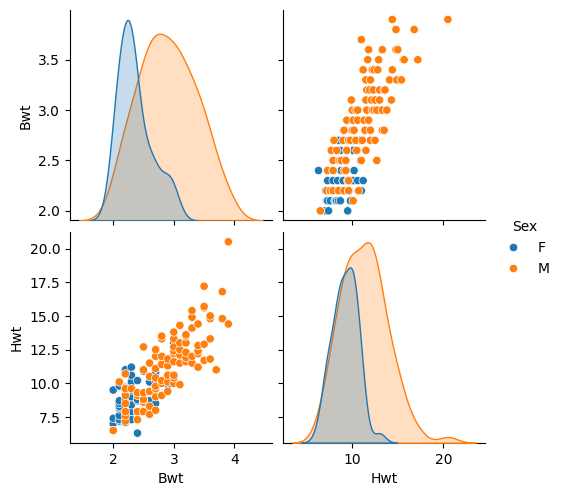

In [ ]:
#import danych
cats = pd.read_csv("cats.csv")
print(cats.head())
print(cats.describe())

#wizualizacja par zmiennych
sns.pairplot(cats, hue = "Sex", vars = ["Bwt", "Hwt"])
plt.show()


W zbiorze występują dwie zmienne objaśniające typu ciągłego (Bwt i Hwt) oraz jedna dyskretna i nieuporządkowana zmienna objaśniana - płeć.


O ile część obserwacji można łatwo sklasyfikować do odpowiedniej płci (np. dla Bwt > 3 będą to zazwyczaj osobniki płci męskiej), o tyle część z nich "nachodzi" na siebie/pokrywa się pod względem wartości atrybutów, reprezentując mimo to różne płcie (np. dla Bwt <3). Liniowa separowalność może być zatem niewystarczająca i należy rozważyć np. wprowadzenie funkcji jądrowej.

In [ ]:
#stworzenie funkcji do wizualizacji rezultatów klasyfikacji oraz rysowania granicy decyzyjnej dla zbioru cats:
def plotCats(X, Y, res):
    y = Y.copy()
    y[y=='F'] = 0
    y[y=='M'] = 1
    y = y.astype(int)
    x_min, x_max = X["Bwt"].min() - .5, X["Bwt"].max() + .5
    y_min, y_max = X["Hwt"].min() - .5, X["Hwt"].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    predictions = res.predict(np.c_[xx.ravel(), yy.ravel()])

    predictions = predictions.reshape(xx.shape)

    predictions[predictions=='F'] = 0
    predictions[predictions=='M'] = 1
    predictions = predictions.astype(int)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, predictions, 1, cmap="RdBu",
                      vmin=0, vmax=1)

    ax_c = f.colorbar(contour)
    ax_c.set_label("Decision class")

    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=55,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="black", linewidth=1)

    ax.set(
       xlim=(x_min, x_max), ylim=(y_min, y_max),
       xlabel="Bwt", ylabel="Hwt")

#Klasyfikacja za pomocą regresji logistycznej wraz z wizualizacją:

In [ ]:
X = cats[["Bwt", "Hwt"]]
y = cats["Sex"].copy()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


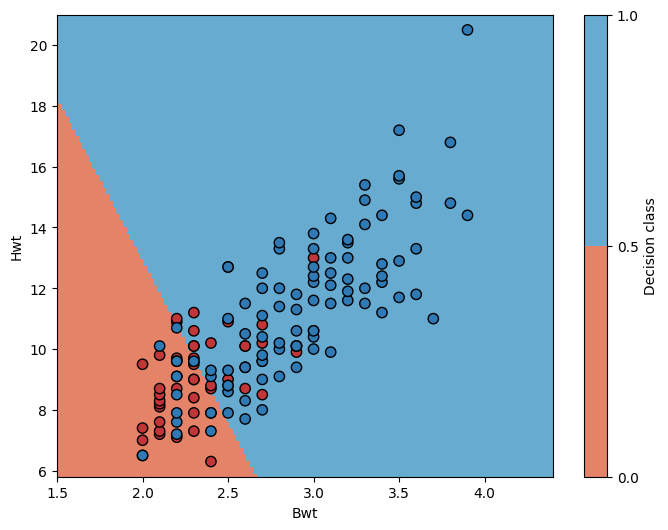

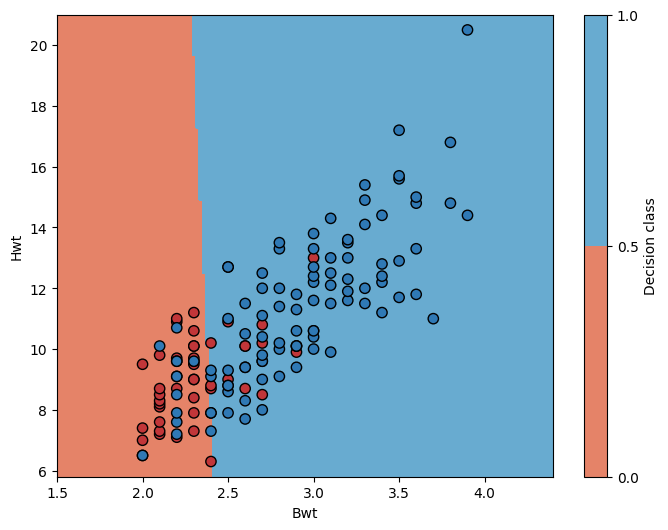

In [ ]:
for i in [1, 50]:
  mdl = LogisticRegression(C = i) #parametr kosztu
  resLG = mdl.fit(X, y)
  plotCats(X, y, resLG)

Tak jak wspomniano klasyfikator liniowy, a w tym wypadku regresja logistyczna, jest niewystarczający do rozróżniania płci kota na podstawie cech Bwt i Hwt. Sporo niebieskich punktów (kotów płci męskiej) wpada w pomarańczowy obszar, czyli jest sklasyfikowana jako kotki, co jest błędne. Ponadto, przy zwiększaniu parametru C (czyli lepszym dopasowaniu do danych uczących) cecha Hwt przestaje niemal całkowicie mieć znaczenie, ale przy niskim koszcie C nie jest ona bez znaczenia, dlatego możliwe, że wprowadzenie nieliniowego klasyfikatora pozwoli na lepszą separowalność z użyciem obu cech.

#Klasyfikacja za pomocą maszyny wektrów nośnych (SVM)


#   liniowa:



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


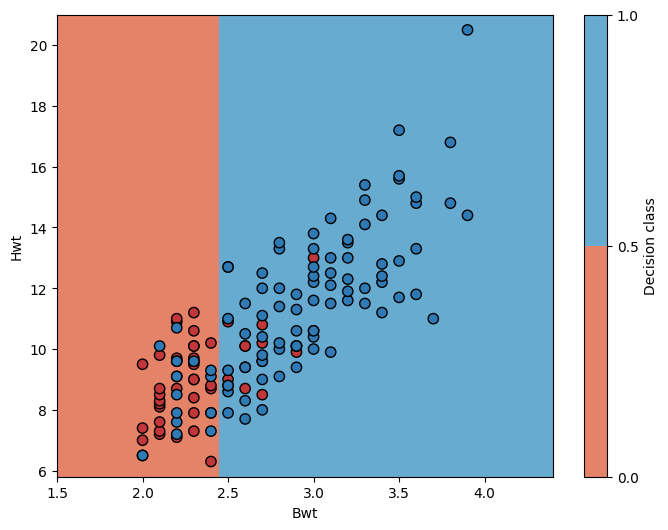

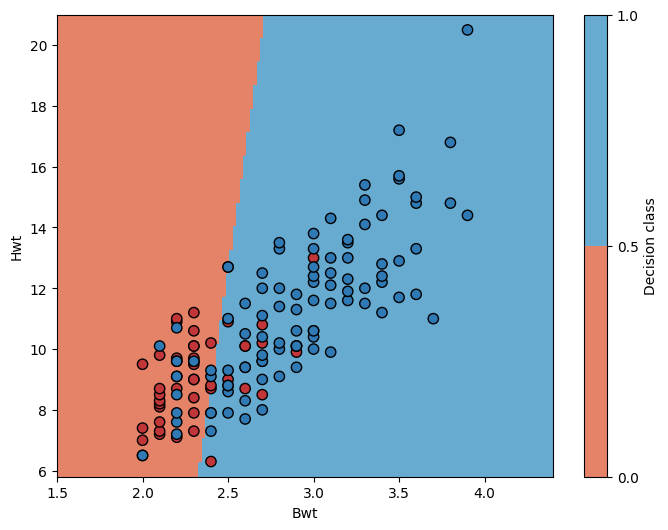

In [ ]:
for i in [1, 50]:
  mdl = svm.SVC(C = i, kernel = 'linear')
  resSVMlin = mdl.fit(X, y)
  plotCats(X, y, resSVMlin)

Wynik klasyfikacji za pomocą maszyny wektorów nośnych (SVM) jest bardzo zbliżony do wyniku regresji logistycznej - w obu przypadkach krzywa podziału to linia prosta o zmiennym nachyleniu w zależności od C (i która nie wydaje się dostatecznym rozwiązaniem problemu podziału kotów na odpowiednią płeć z użyciech cech Bwt i Hwt).



#   nieliniowa (z radialną funkcją bazową):








/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


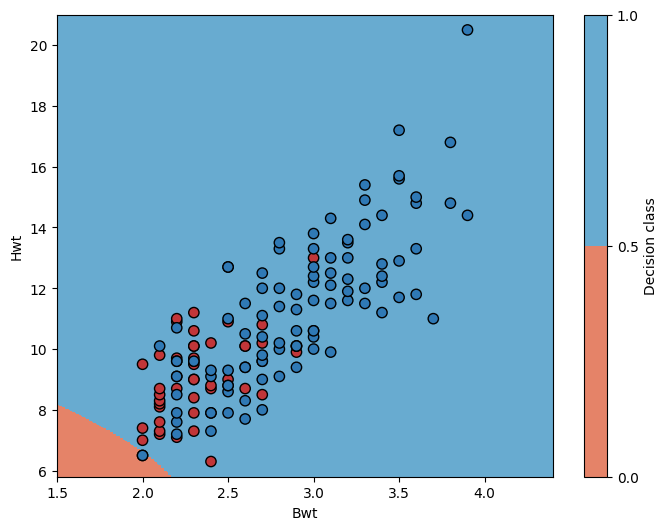

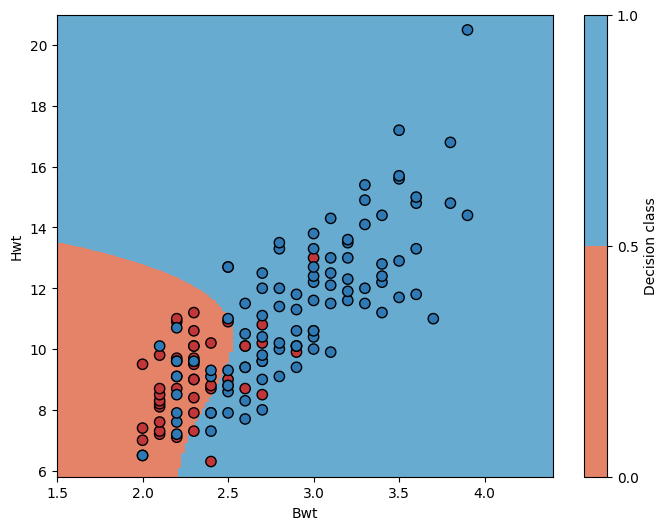

In [ ]:
for i in [1, 50]:
  mdl = svm.SVC(C = i, kernel = 'rbf')
  resSVMnotlin = mdl.fit(X, y)
  plotCats(X, y, resSVMnotlin)

Dla liniowego klasyfikatora SVM, przy rosnącym koszcie C prosta oddzielająca koty różnej płci zmienia nieco swoje nachylenie (początkowo cecha Hwt nie ma praktycznie znaczenia). Natomiast przy zastosowaniu funkcji jądra podział na różne płcie obrazuje krzywa, która przy rosnącym koszcie C ma coraz bardziej złożony kształt, przypominający "slalom" między punktami reprezentującymi kocury i kotki. Nieliniowy SVM wydaje się zatem mieć lepsze zdolności do dopasowywania się do zaobserwowanych danych. Przy niskim koszcie C (1) klasyfikuje jednak niemal całą badaną populację jako kocury, a więc działa bardziej na korzyść liczniej reprezentowanej klasy niż liniowy SVM przy tym samym koszcie.

In [ ]:
from sklearn import metrics

print(metrics.confusion_matrix(y, predictions, labels = ["F", "M"] ))
print(metrics.classification_report(y, predictions,labels = ["F", "M"] ))

print(metrics.accuracy_score(y, predictions))
print(metrics.balanced_accuracy_score(y,predictions))

[[33 14]
 [15 82]]
              precision    recall  f1-score   support

           F       0.69      0.70      0.69        47
           M       0.85      0.85      0.85        97

    accuracy                           0.80       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.80      0.80      0.80       144

0.7986111111111112
0.773744242158368


In [ ]:

predictions = resLG.predict(X)
print(metrics.confusion_matrix(y, predictions, labels = ["F", "M"] ))
print(metrics.classification_report(y, predictions,labels = ["F", "M"] ))

print(metrics.accuracy_score(y, predictions))
print(metrics.balanced_accuracy_score(y,predictions))

[[31 16]
 [13 84]]
              precision    recall  f1-score   support

           F       0.70      0.66      0.68        47
           M       0.84      0.87      0.85        97

    accuracy                           0.80       144
   macro avg       0.77      0.76      0.77       144
weighted avg       0.80      0.80      0.80       144

0.7986111111111112
0.7627769247642027


Zarówno przy liniowym, jak i nieliniowym SVM accuracy modelu wyniosło 0,8 (poprawnie sklasyfikowanych 115 kotów spośrów 144 łącznie).
Niemniej, nieliniowy SVM pozwalał na lepszy odzysk (recall) dla kotek, stąd średnia (arytmetyczna) miara oceny jakości klasyfikacji w tym przypadku wyszła nieco lepsza.


#Równoważenie wpływu liczności obiektów w każdej z klas decyzyjnych na rezultat klasyfikacji

In [ ]:
#Z wagami
weights = {"F":1, "M":(np.count_nonzero(y=="M")/np.count_nonzero(y))}
print(weights)
mdl = svm.SVC(C = 50, kernel = 'rbf', class_weight = weights)
resSVM = mdl.fit(X, y)
predictions = resSVM.predict(X)
print(metrics.confusion_matrix(y, predictions, labels=["F", "M"]))
print(metrics.classification_report(y, predictions))

{'F': 1, 'M': 0.6736111111111112}
[[37 10]
 [25 72]]
              precision    recall  f1-score   support

           F       0.60      0.79      0.68        47
           M       0.88      0.74      0.80        97

    accuracy                           0.76       144
   macro avg       0.74      0.76      0.74       144
weighted avg       0.79      0.76      0.76       144



Zastosowanie wag zmniejsza znaczenie kocurów (jako liczniejszej klasy) w treningu modelu. Znacząco poprawia recall dla kotek, zmnieszając równocześnie precyzję, a dla kocurów odwrotnie - precyzja się poprawia (teraz tylko 82 koty są sklasyfikowane jako kocury wobec 96 bez ważenia), a recall zmniejsza.

#Próba treningowa i testowa:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train, X_test)
print(y_train, y_test)

     Bwt   Hwt
134  3.5  17.2
71   2.5  12.7
55   2.2   9.6
85   2.7  12.0
81   2.7   9.6
..   ...   ...
34   2.5   9.0
63   2.4   9.3
4    2.1   7.3
100  3.0  10.4
33   2.4  10.2

[100 rows x 2 columns]      Bwt   Hwt
88   2.8  10.0
64   2.5   7.9
129  3.4  14.4
115  3.2  11.9
135  3.6  11.8
126  3.4  12.2
17   2.2  11.0
15   2.2   9.7
35   2.5  10.9
51   2.2   7.6
27   2.3  10.1
106  3.0  13.3
99   3.0  10.0
125  3.4  11.2
60   2.4   7.9
48   2.0   6.5
41   2.7  10.8
124  3.3  15.4
24   2.3   9.6
37   2.6  10.1
98   2.9  11.8
18   2.3   7.3
143  3.9  20.5
132  3.5  15.6
53   2.2   8.5
109  3.1  11.5
3    2.1   7.2
20   2.3   8.4
70   2.5  12.7
46   3.0  13.0
91   2.8  12.0
44   2.9  10.1
68   2.5   9.3
36   2.6   8.7
11   2.1   9.8
19   2.3   7.9
1    2.0   7.4
112  3.1  13.0
57   2.2  10.7
73   2.6   8.3
43   2.9  10.1
13   2.2   8.7
141  3.8  16.8
82   2.7   9.8
134    M
71     M
55     M
85     M
81     M
      ..
34     F
63     M
4      F
100    M
33     F
Name: Sex, Length: 100

In [ ]:
mdl_train_test = svm.SVC(C = 50, kernel = 'rbf')
mdl_train_test.fit(X_train, y_train)

predictions_train = mdl_train_test.predict(X_train)
print(metrics.classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           F       0.66      0.72      0.69        29
           M       0.88      0.85      0.86        71

    accuracy                           0.81       100
   macro avg       0.77      0.78      0.78       100
weighted avg       0.82      0.81      0.81       100



In [ ]:
predictions_test = mdl_train_test.predict(X_test)
print(metrics.classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           F       0.73      0.61      0.67        18
           M       0.76      0.85      0.80        26

    accuracy                           0.75        44
   macro avg       0.75      0.73      0.73        44
weighted avg       0.75      0.75      0.75        44



Statystyki klasyfikacji dla zbioru testowego są generalnie słabsze/niższe niż dla części treningowej. Jest to naturalną konsekwencją faktu, że model był uczony właśnie na zbiorze treningowym i to on służył do optymalizacji parametrów SVM tak, aby jak najlepiej rozdzielać (klasyfikować) zadane obserwacje z zachowaniem jak najszerszego, możliwego marginesu oddzielającego klasy (płcie). Zbiór testowy w tym procesie nie brał udziału, a więc jest dla maszyny czymś nowym i tym, co ma za zadanie zweryfikować, czy "nauczony" model rzeczywiście sprawdza się w klasyfikacji kotów na bazie Hwt i Bwt do odpowiedniej płci (jeśli stytystyki klasyfikacji na zbiorze testowym byłyby wyraźnie słabsze od tych na zbiorze uczącym, to zdolności modelu do generalizacji byłyby wątpliwe).
.